# Clustering met DBSCAN van scikit-learn

In [153]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.cluster import DBSCAN

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [18, 9]

In [154]:
data_path = "../data/origineel"

if not Path(data_path).is_dir():
    raise Warning("Data path does not exist")

In [155]:
# Lijst van .csv-bestanden
data_file_paths = [p for p in Path(data_path).iterdir() if p.suffix==".csv"]

In [156]:
def DBSCAN1(cable, scale, epsilon min_pts):
   
    # Lees de drie bestanden van het circuit als pandas DataFrame
    cableconfig = pd.read_csv(data_file_paths[3*cable-3], sep=";")
    partialdischarges = pd.read_csv(data_file_paths[3*cable-2], sep=";")
    warning = pd.read_csv(data_file_paths[3*cable-1], sep=";")
  
    # Namen van de kolommen
    time_col, location_col, charge_col = partialdischarges.columns
  
    # Check dat iedere rij locatie en lading heeft, of geen van beide
    for i in np.arange(len(partialdischarges))[np.isnan(partialdischarges[location_col]) != np.isnan(partialdischarges[charge_col])]:
        raise Warning(f"Row {i} has missing values")
  
    # Lijst met bools die aangeeft of er op dat tijdstip een PD was
    pd_occured = ~np.isnan(partialdischarges[location_col])
    
    # De drie kolommen; alleen op tijdstippen met PD
    locations = partialdischarges[location_col][pd_occured]
    times = partialdischarges[time_col][pd_occured].apply(datetime.datetime.fromisoformat)
    
    # de data in de goede vorm zetten
    time_scale=scale*len(partialdischarges)/(max(locations))
    data=np.empty((2,len(locations)))
    data[0]=locations.index/time_scale
    data[1]=locations
    data=data.T

    # DBSCAN uitvoeren
    labels = DBSCAN(eps=epsilon, min_samples=min_pts).fit(data).labels_ 

    # de labels die DBSCAN geeft toevoegen aan de dataframe
    loc_frame = locations.to_frame()
    loc_frame["times"]=pd.Series(times)
    loc_frame.index=pd.RangeIndex(len(locations))
    loc_frame["label"]=pd.Series(labels)
    
    # resultaten weergeven
    s=list(set(labels))
    s.sort()
    print("There are",len(s)-1,"clusters")
    for i in s:
        plt.scatter(x = loc_frame[loc_frame["label"]==i][location_col], y = loc_frame[loc_frame["label"]==i]["times"], s=.01)

# Kabel 1

There are 3 clusters


<IPython.core.display.Javascript object>


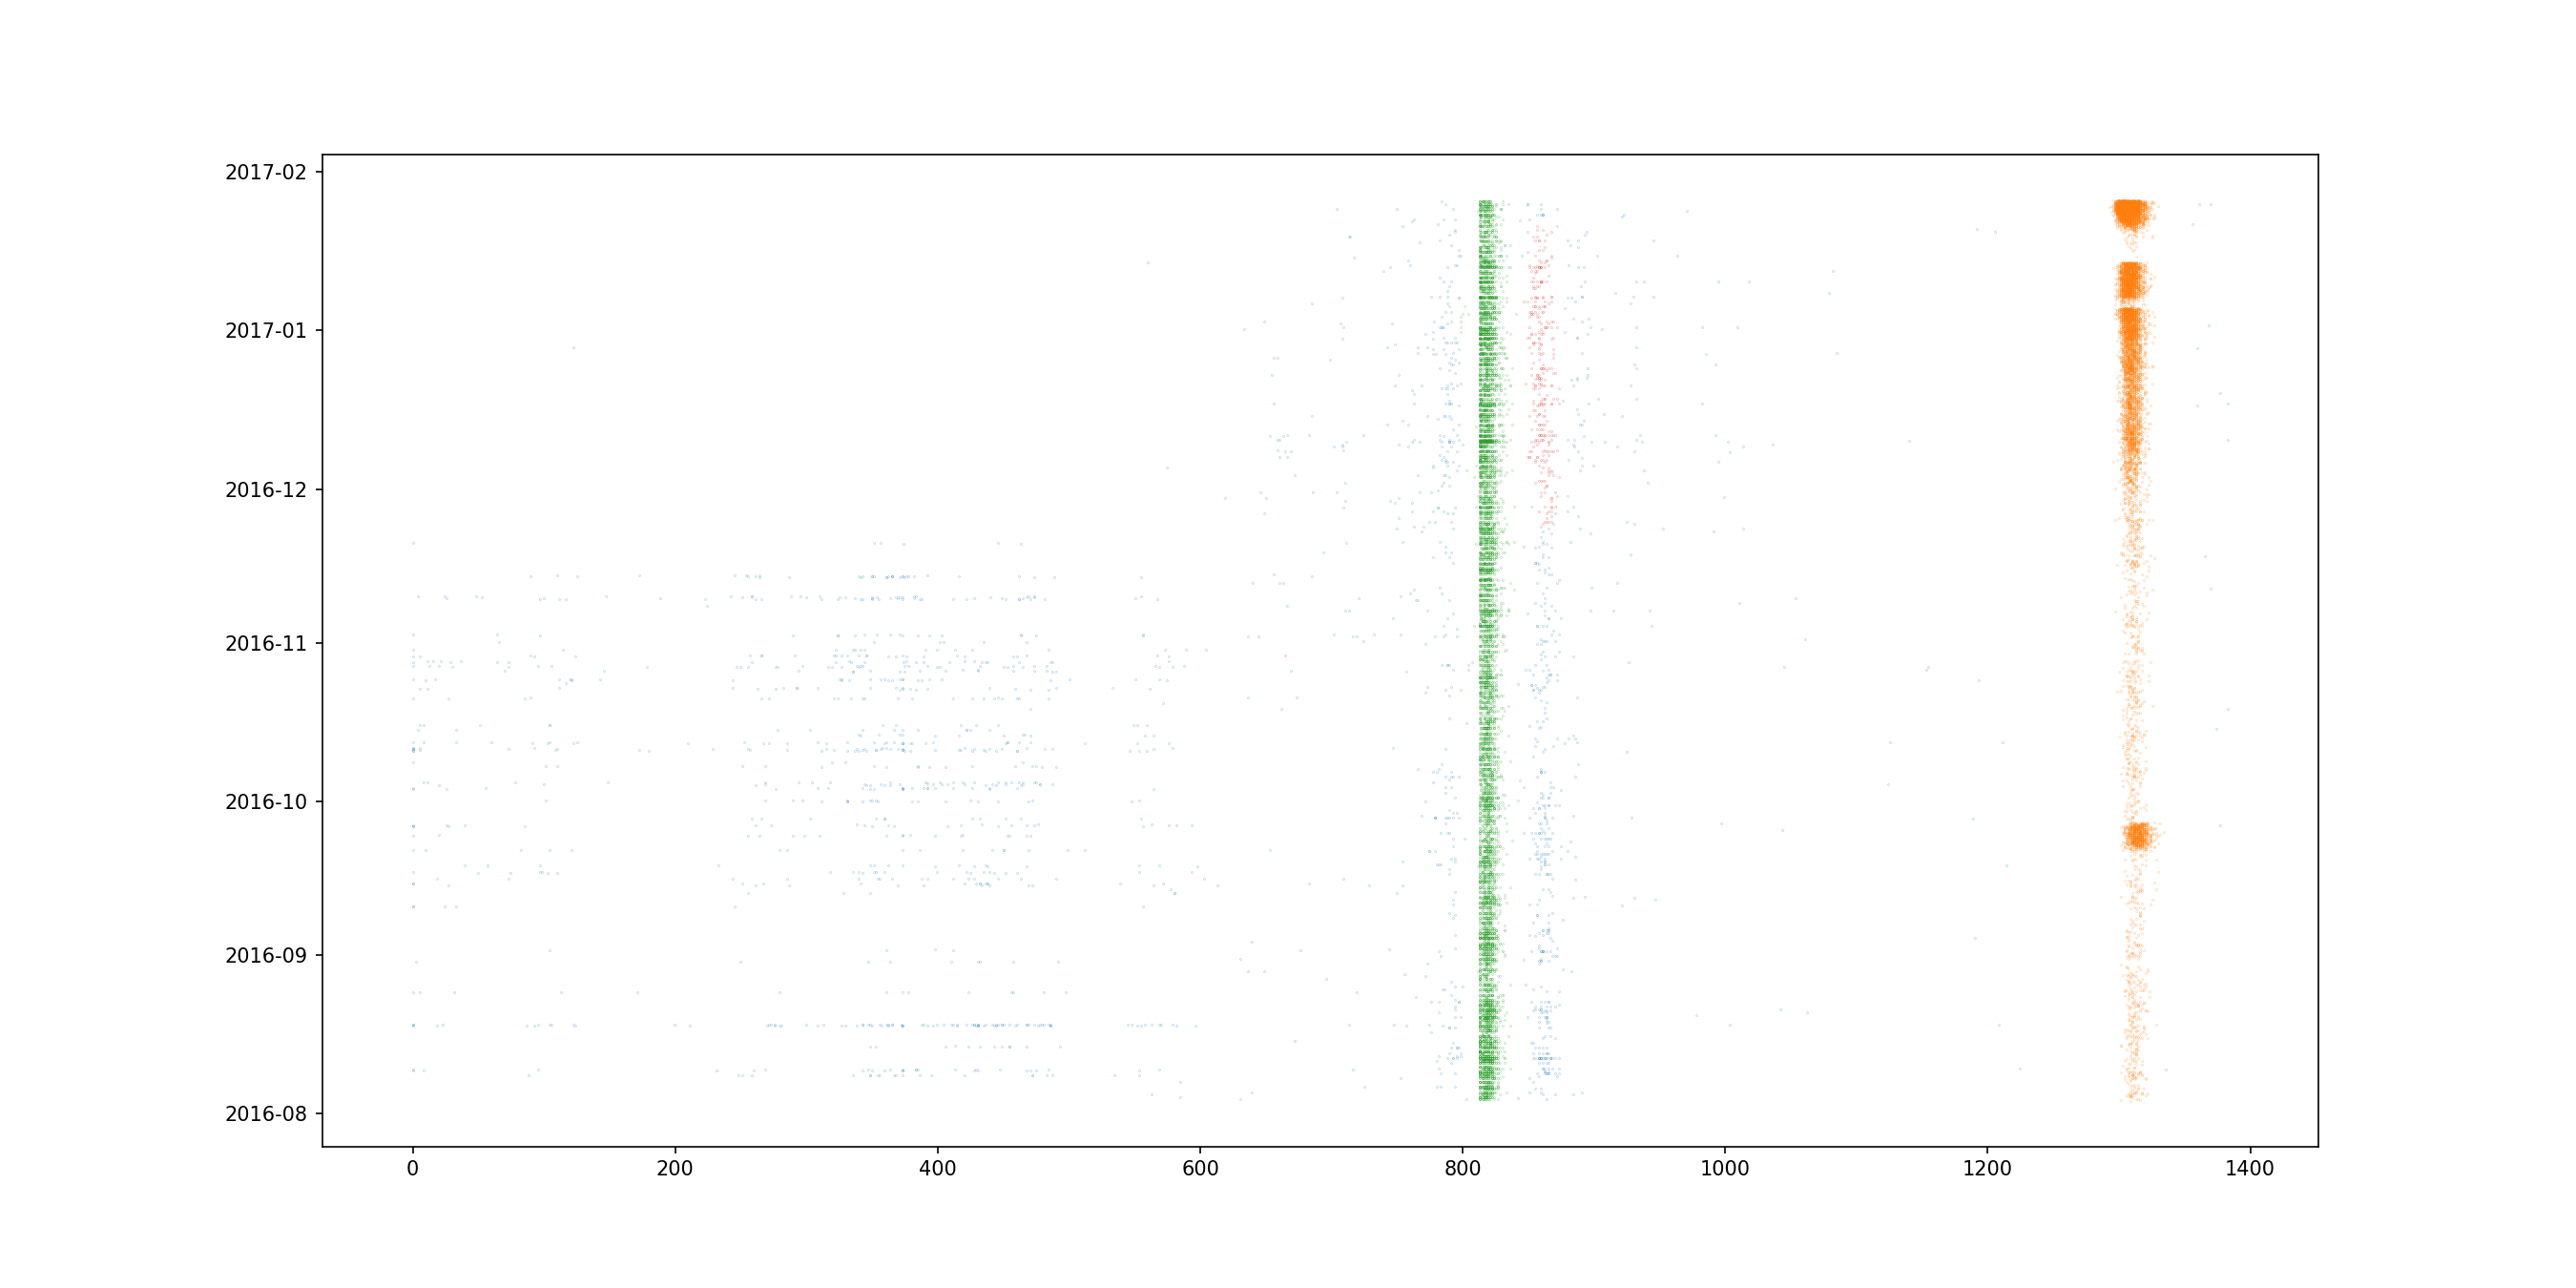

In [166]:
DBSCAN1(1,10,10,100)

# Kabel 2

There are 4 clusters


<IPython.core.display.Javascript object>


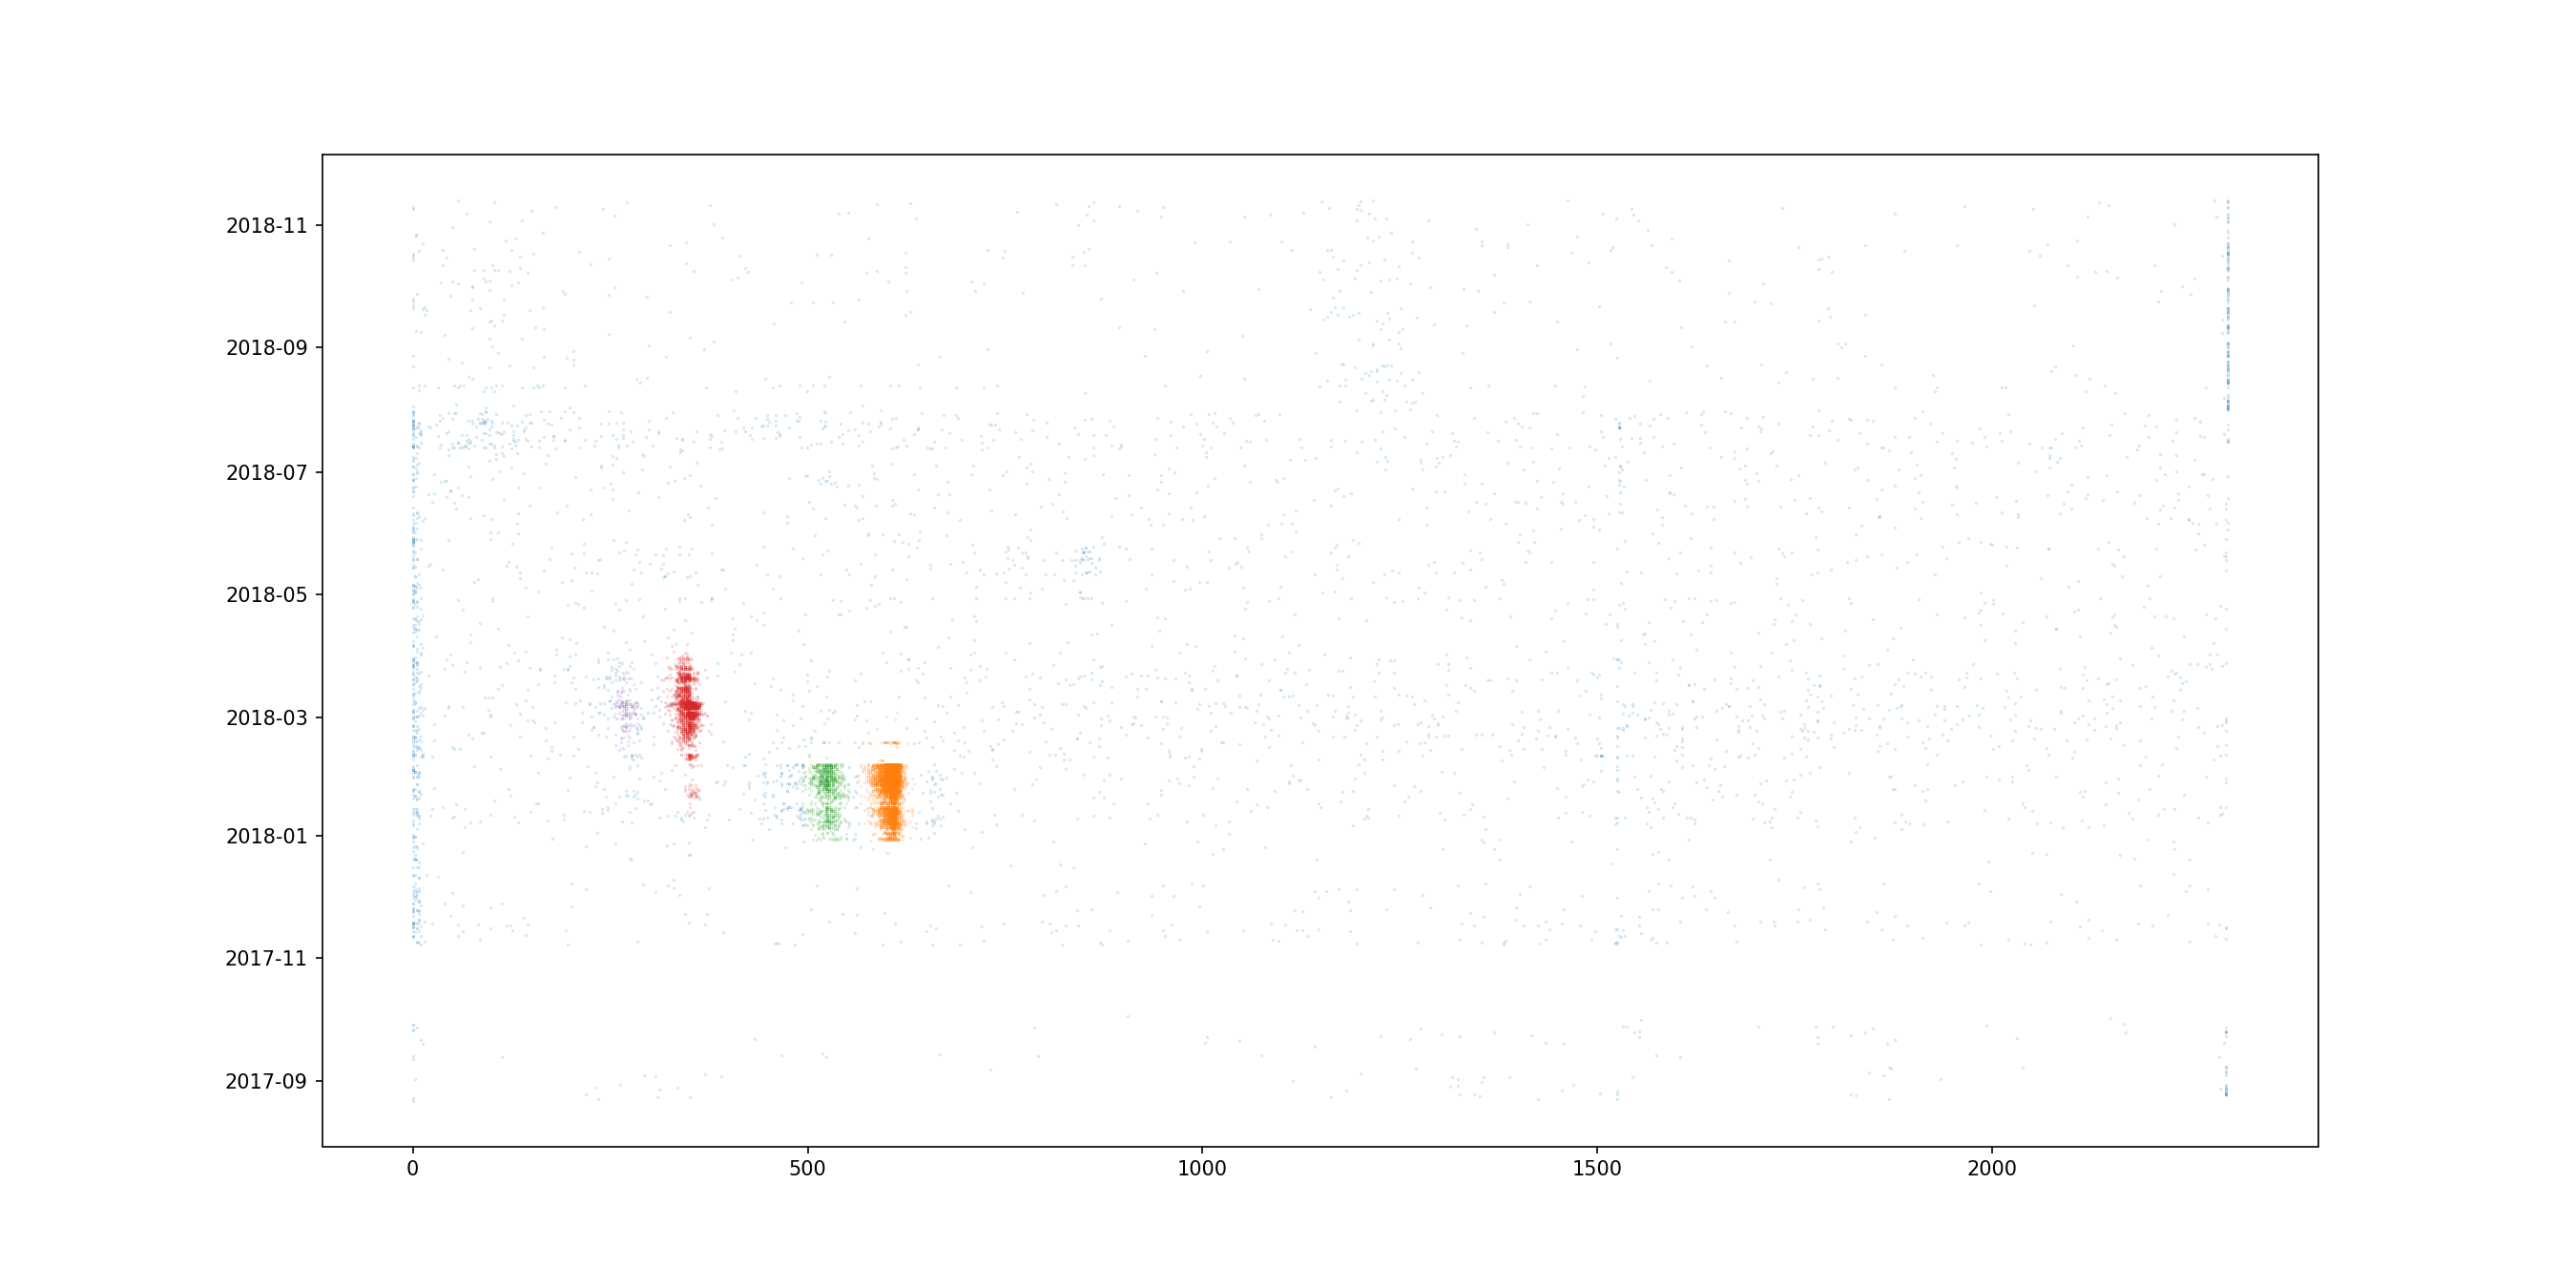

In [167]:
DBSCAN1(2,10,10,100)

# Kabel 3

There are 5 clusters


<IPython.core.display.Javascript object>


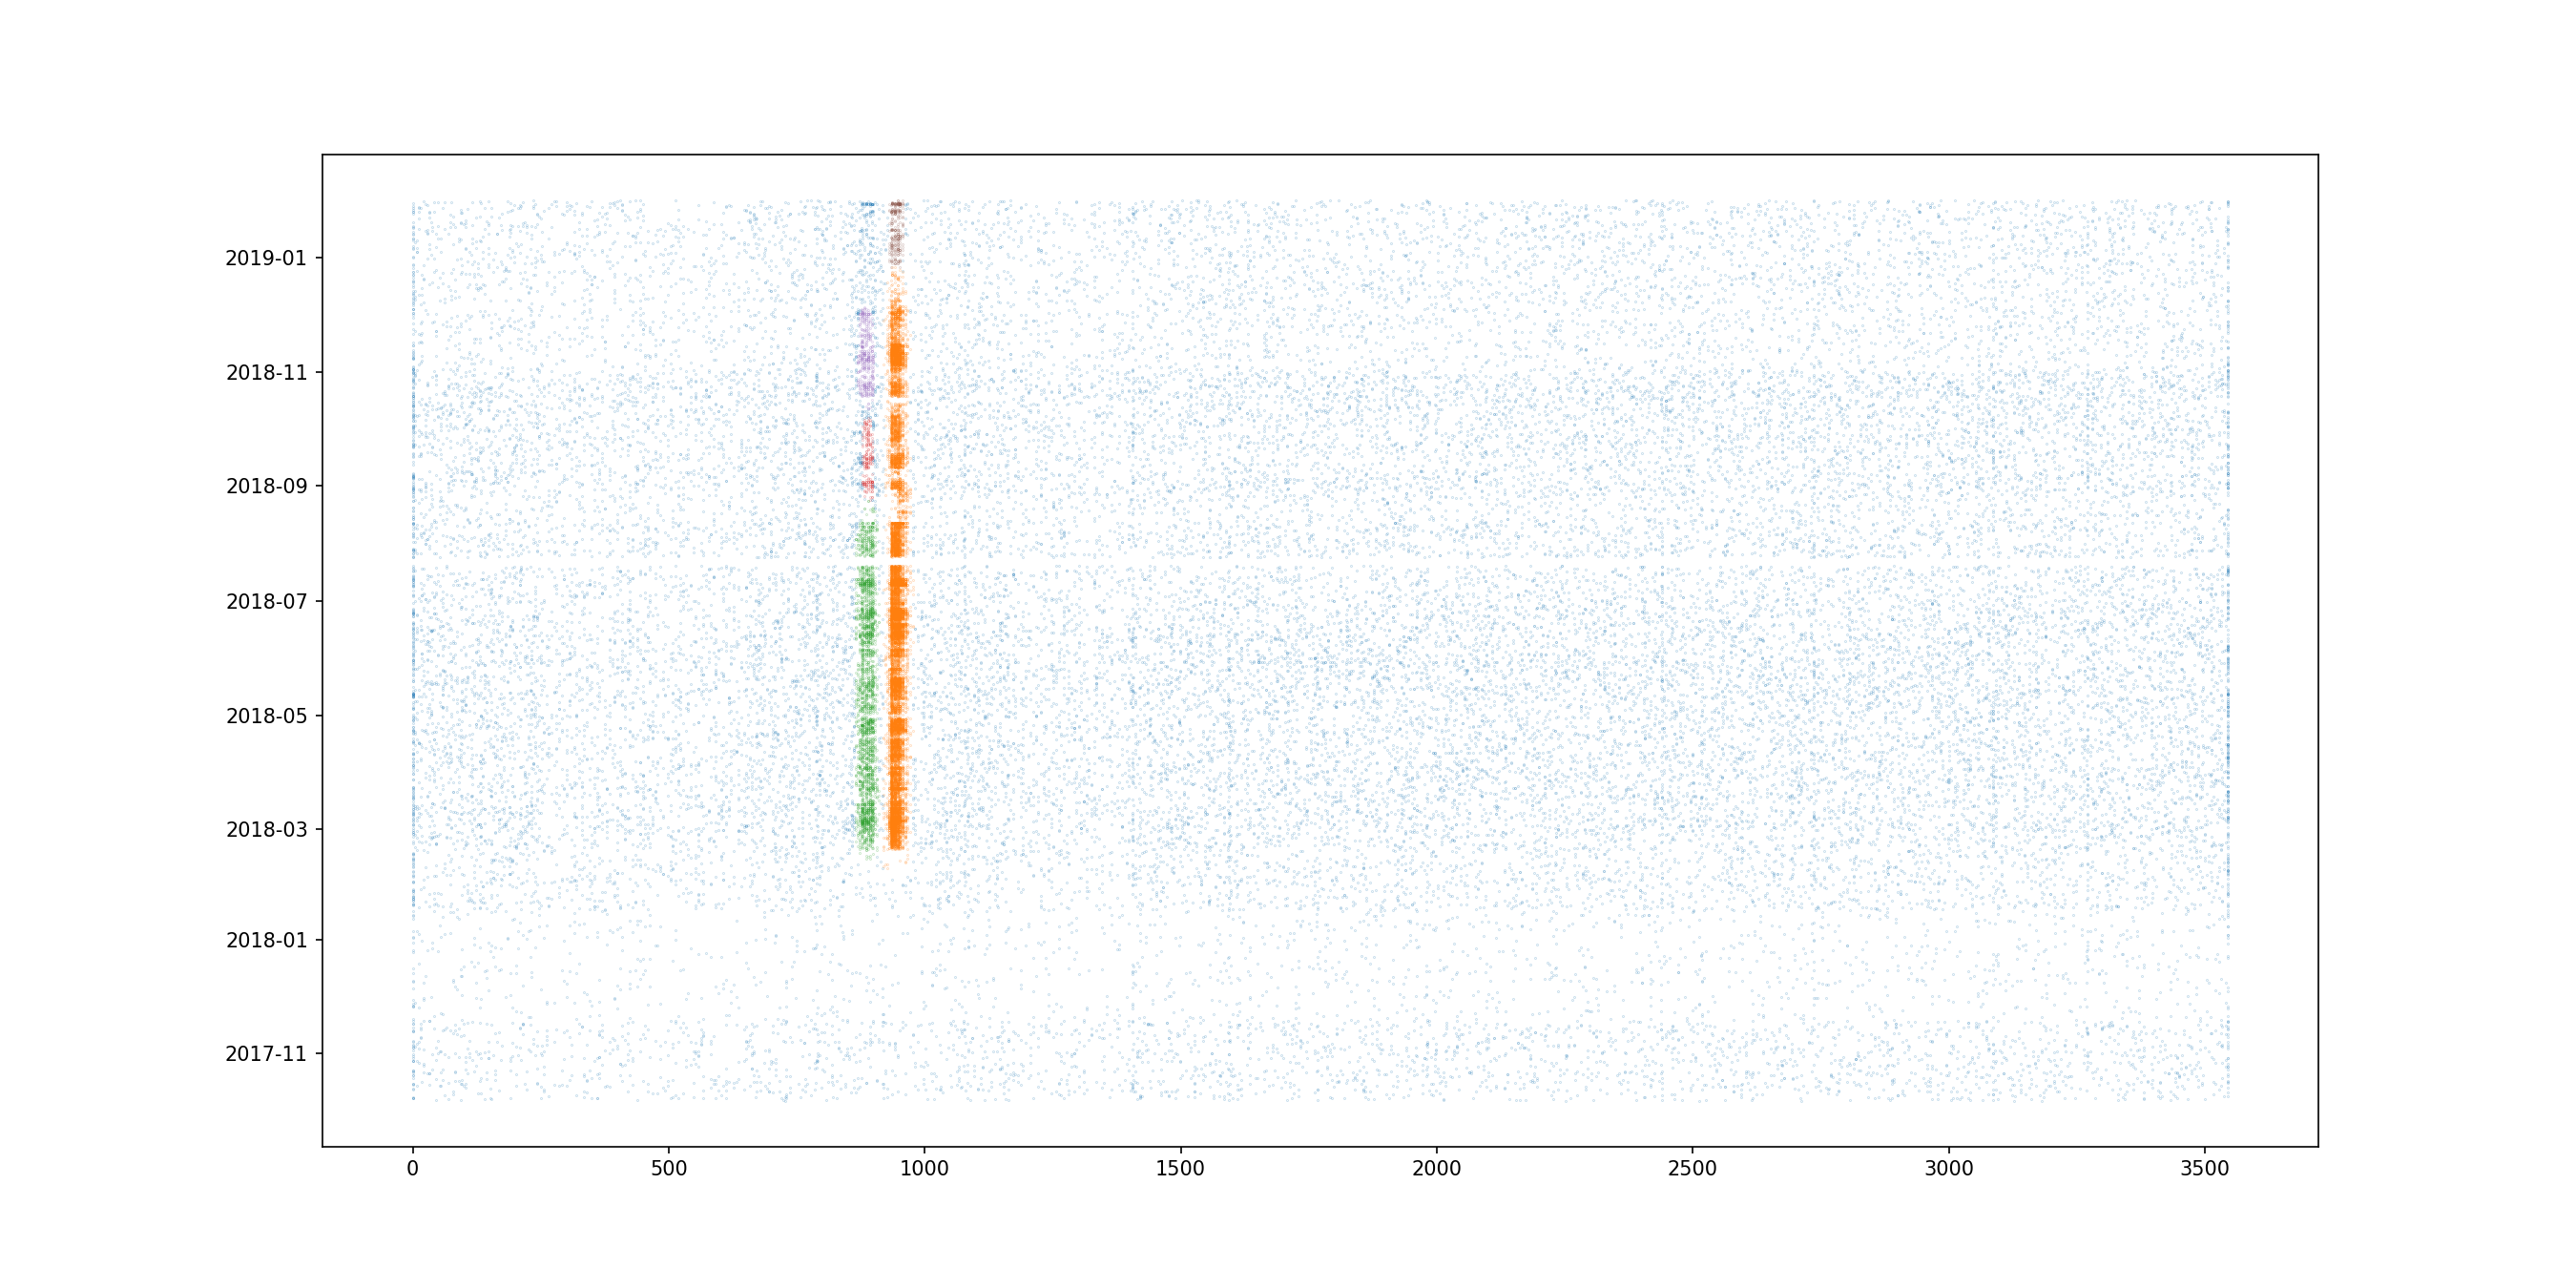

In [168]:
DBSCAN1(3,10,10,100)

# Kabel 3, gevoeliger

There are 2 clusters


<IPython.core.display.Javascript object>


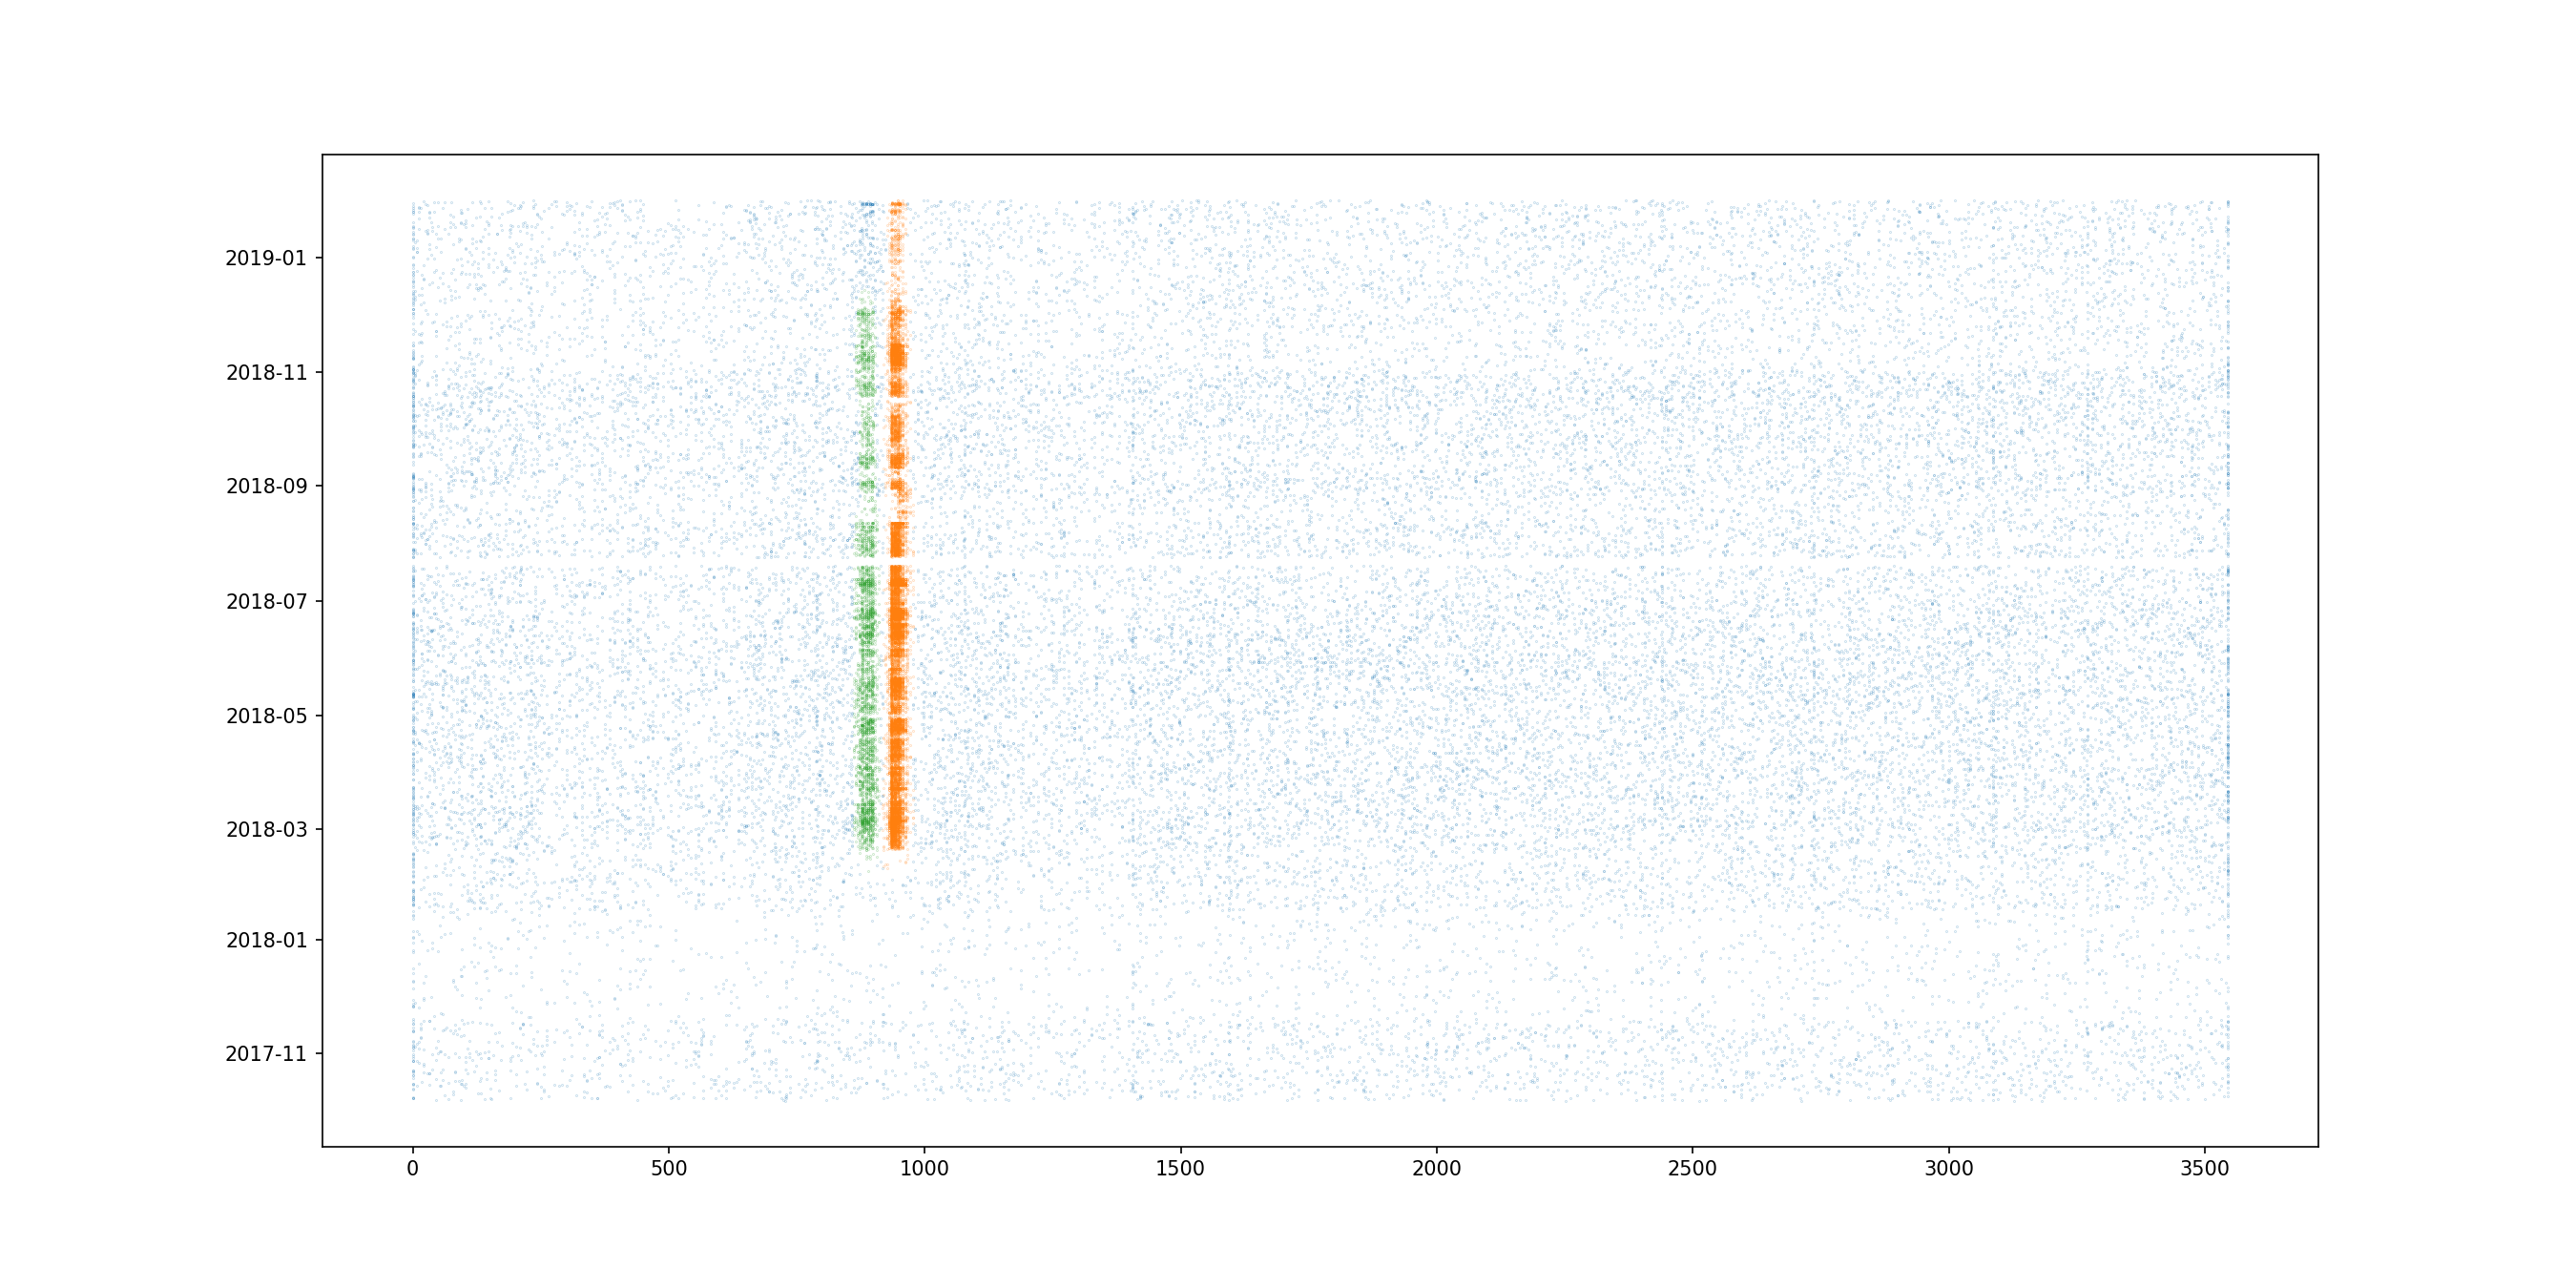

In [169]:
DBSCAN1(3,10,10,75)

# Kabel 3, minder gevoelig

There are 2 clusters


<IPython.core.display.Javascript object>


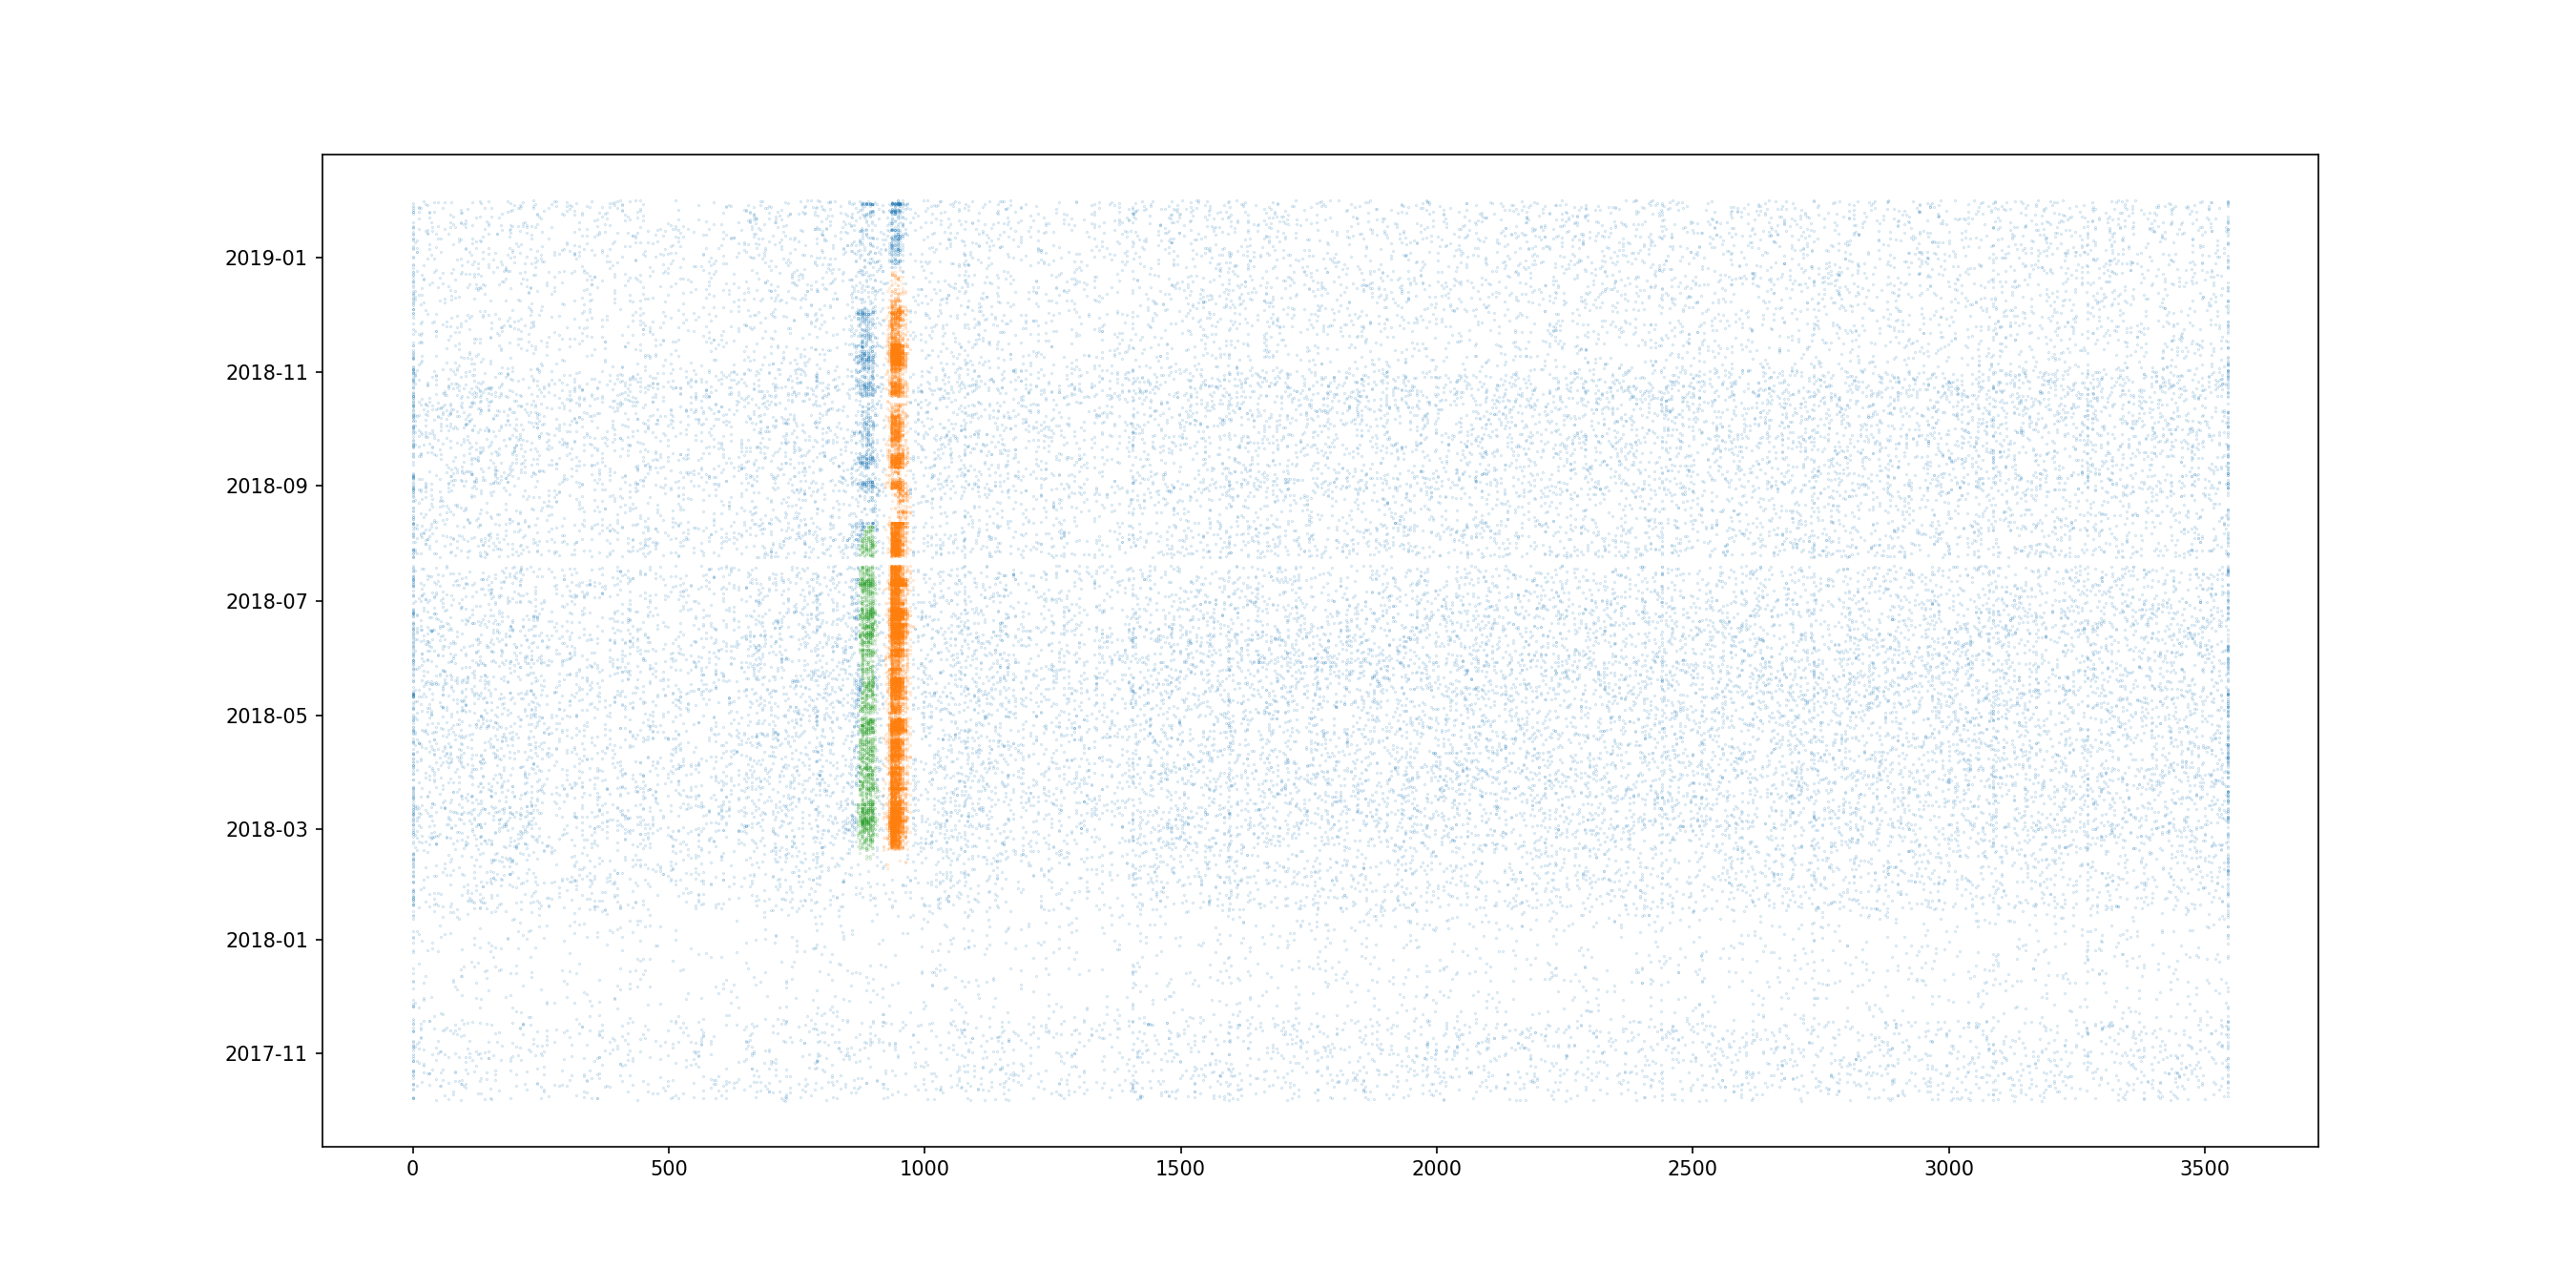

In [170]:
DBSCAN1(3,10,10,150)

# Kabel 4

There are 4 clusters


<IPython.core.display.Javascript object>


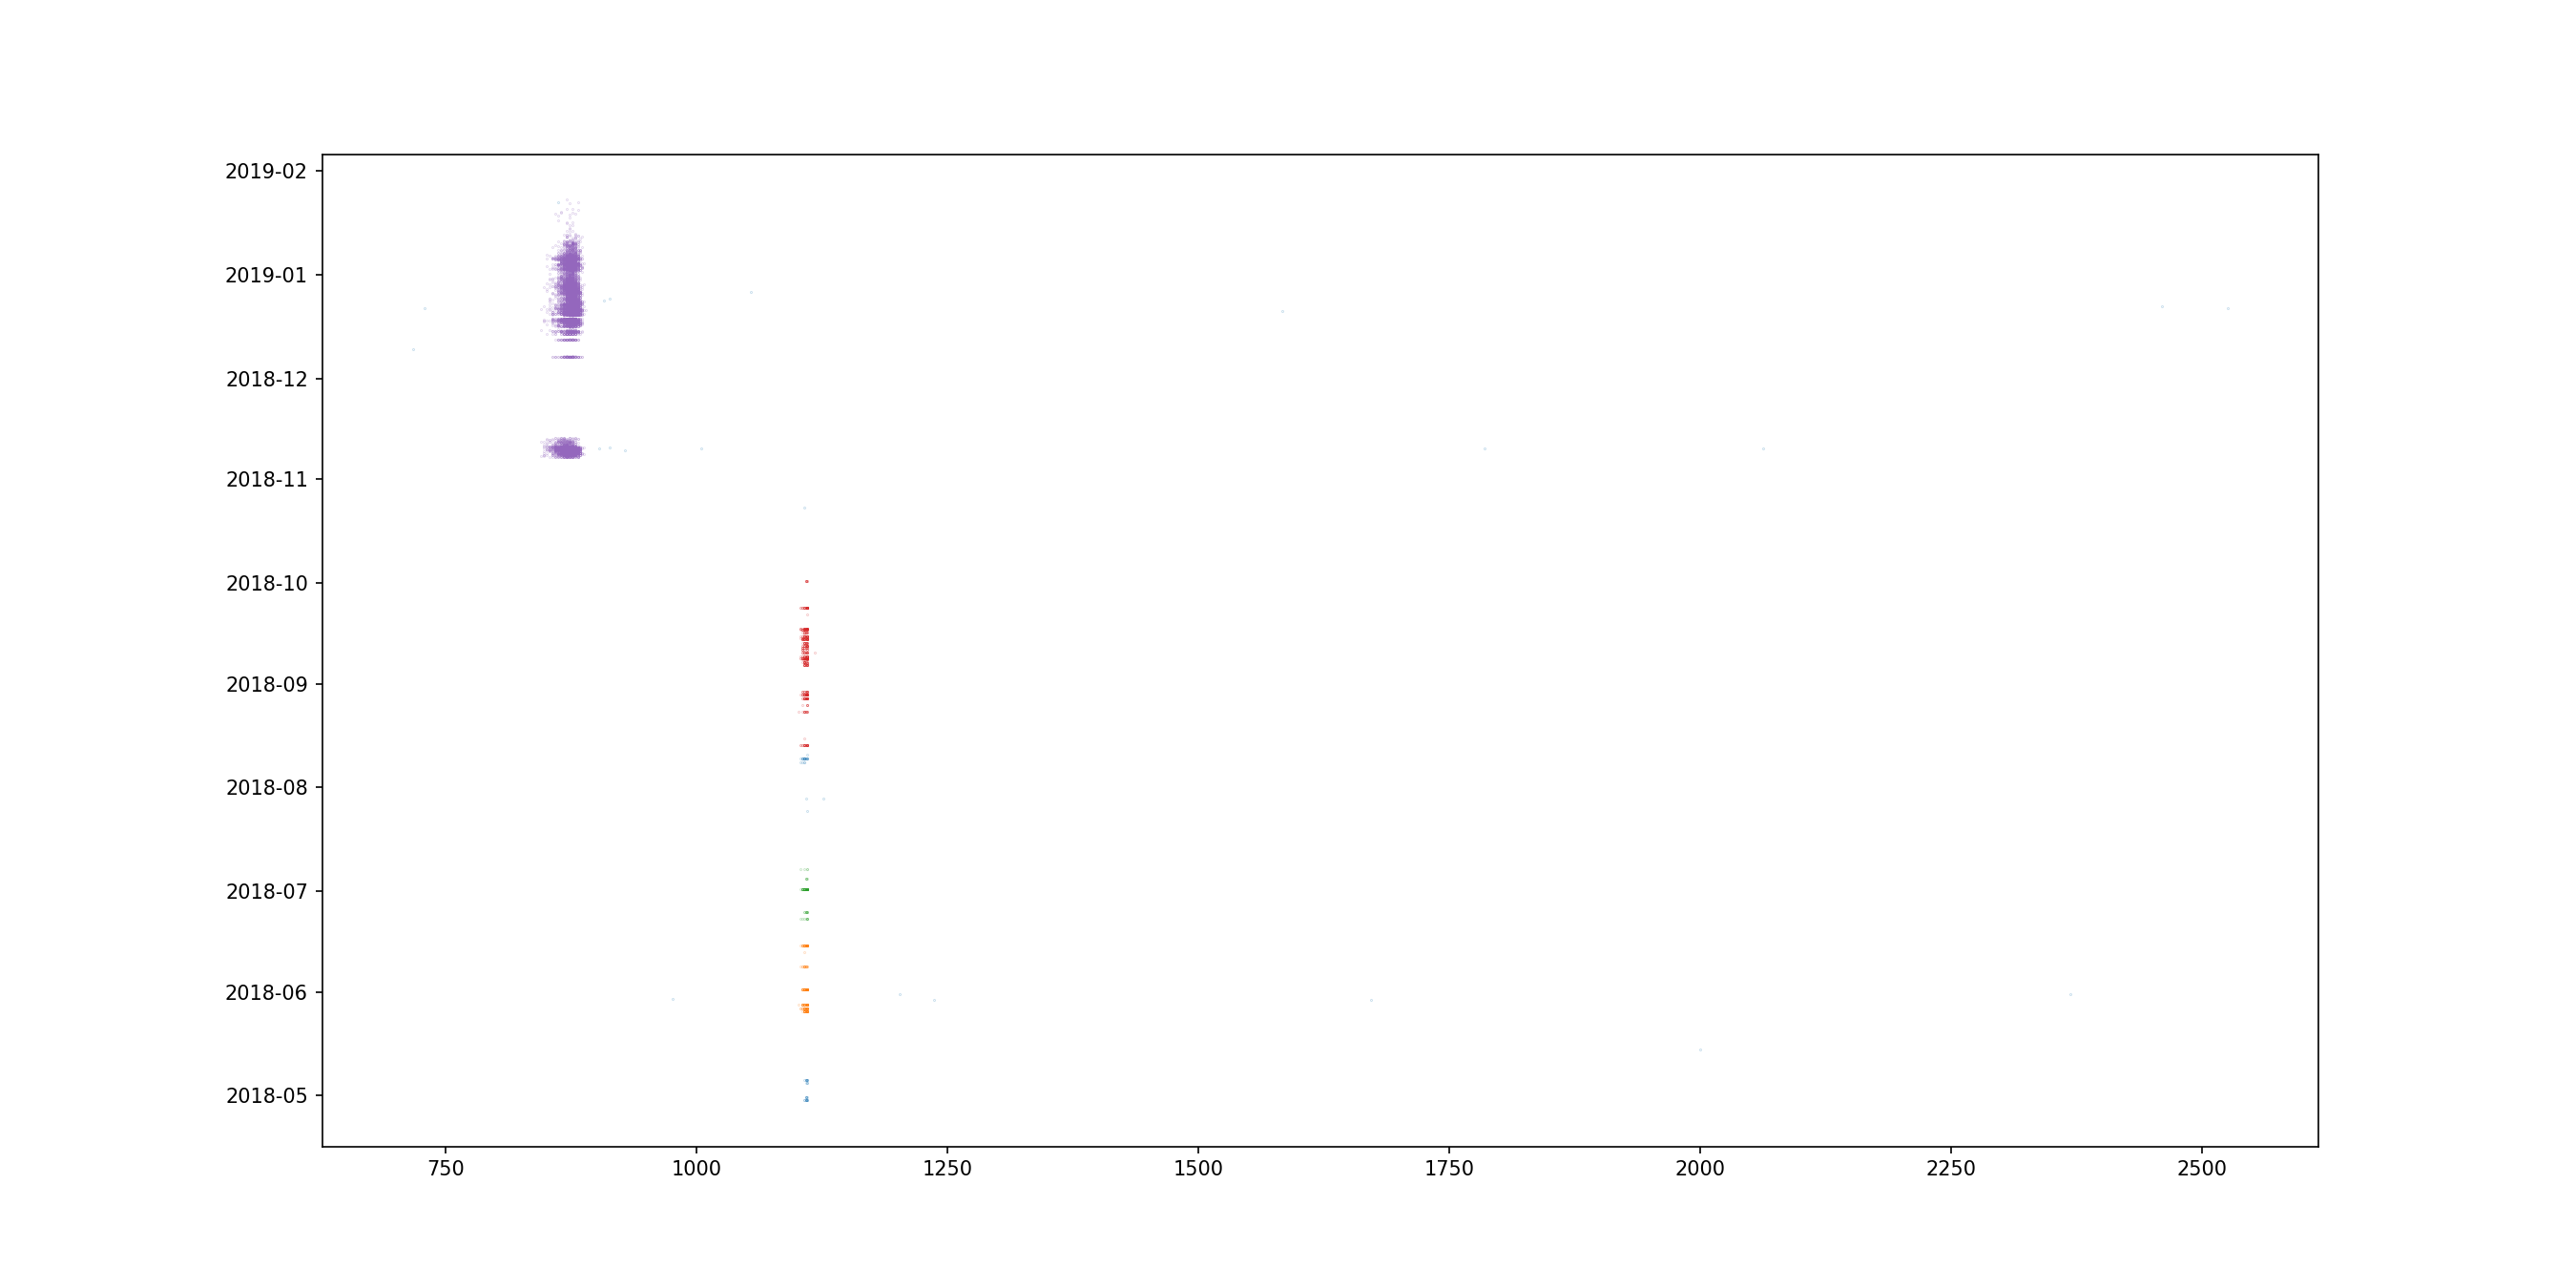

In [171]:
DBSCAN1(4,10,10,100)

# Kabel 5

There are 11 clusters


<IPython.core.display.Javascript object>


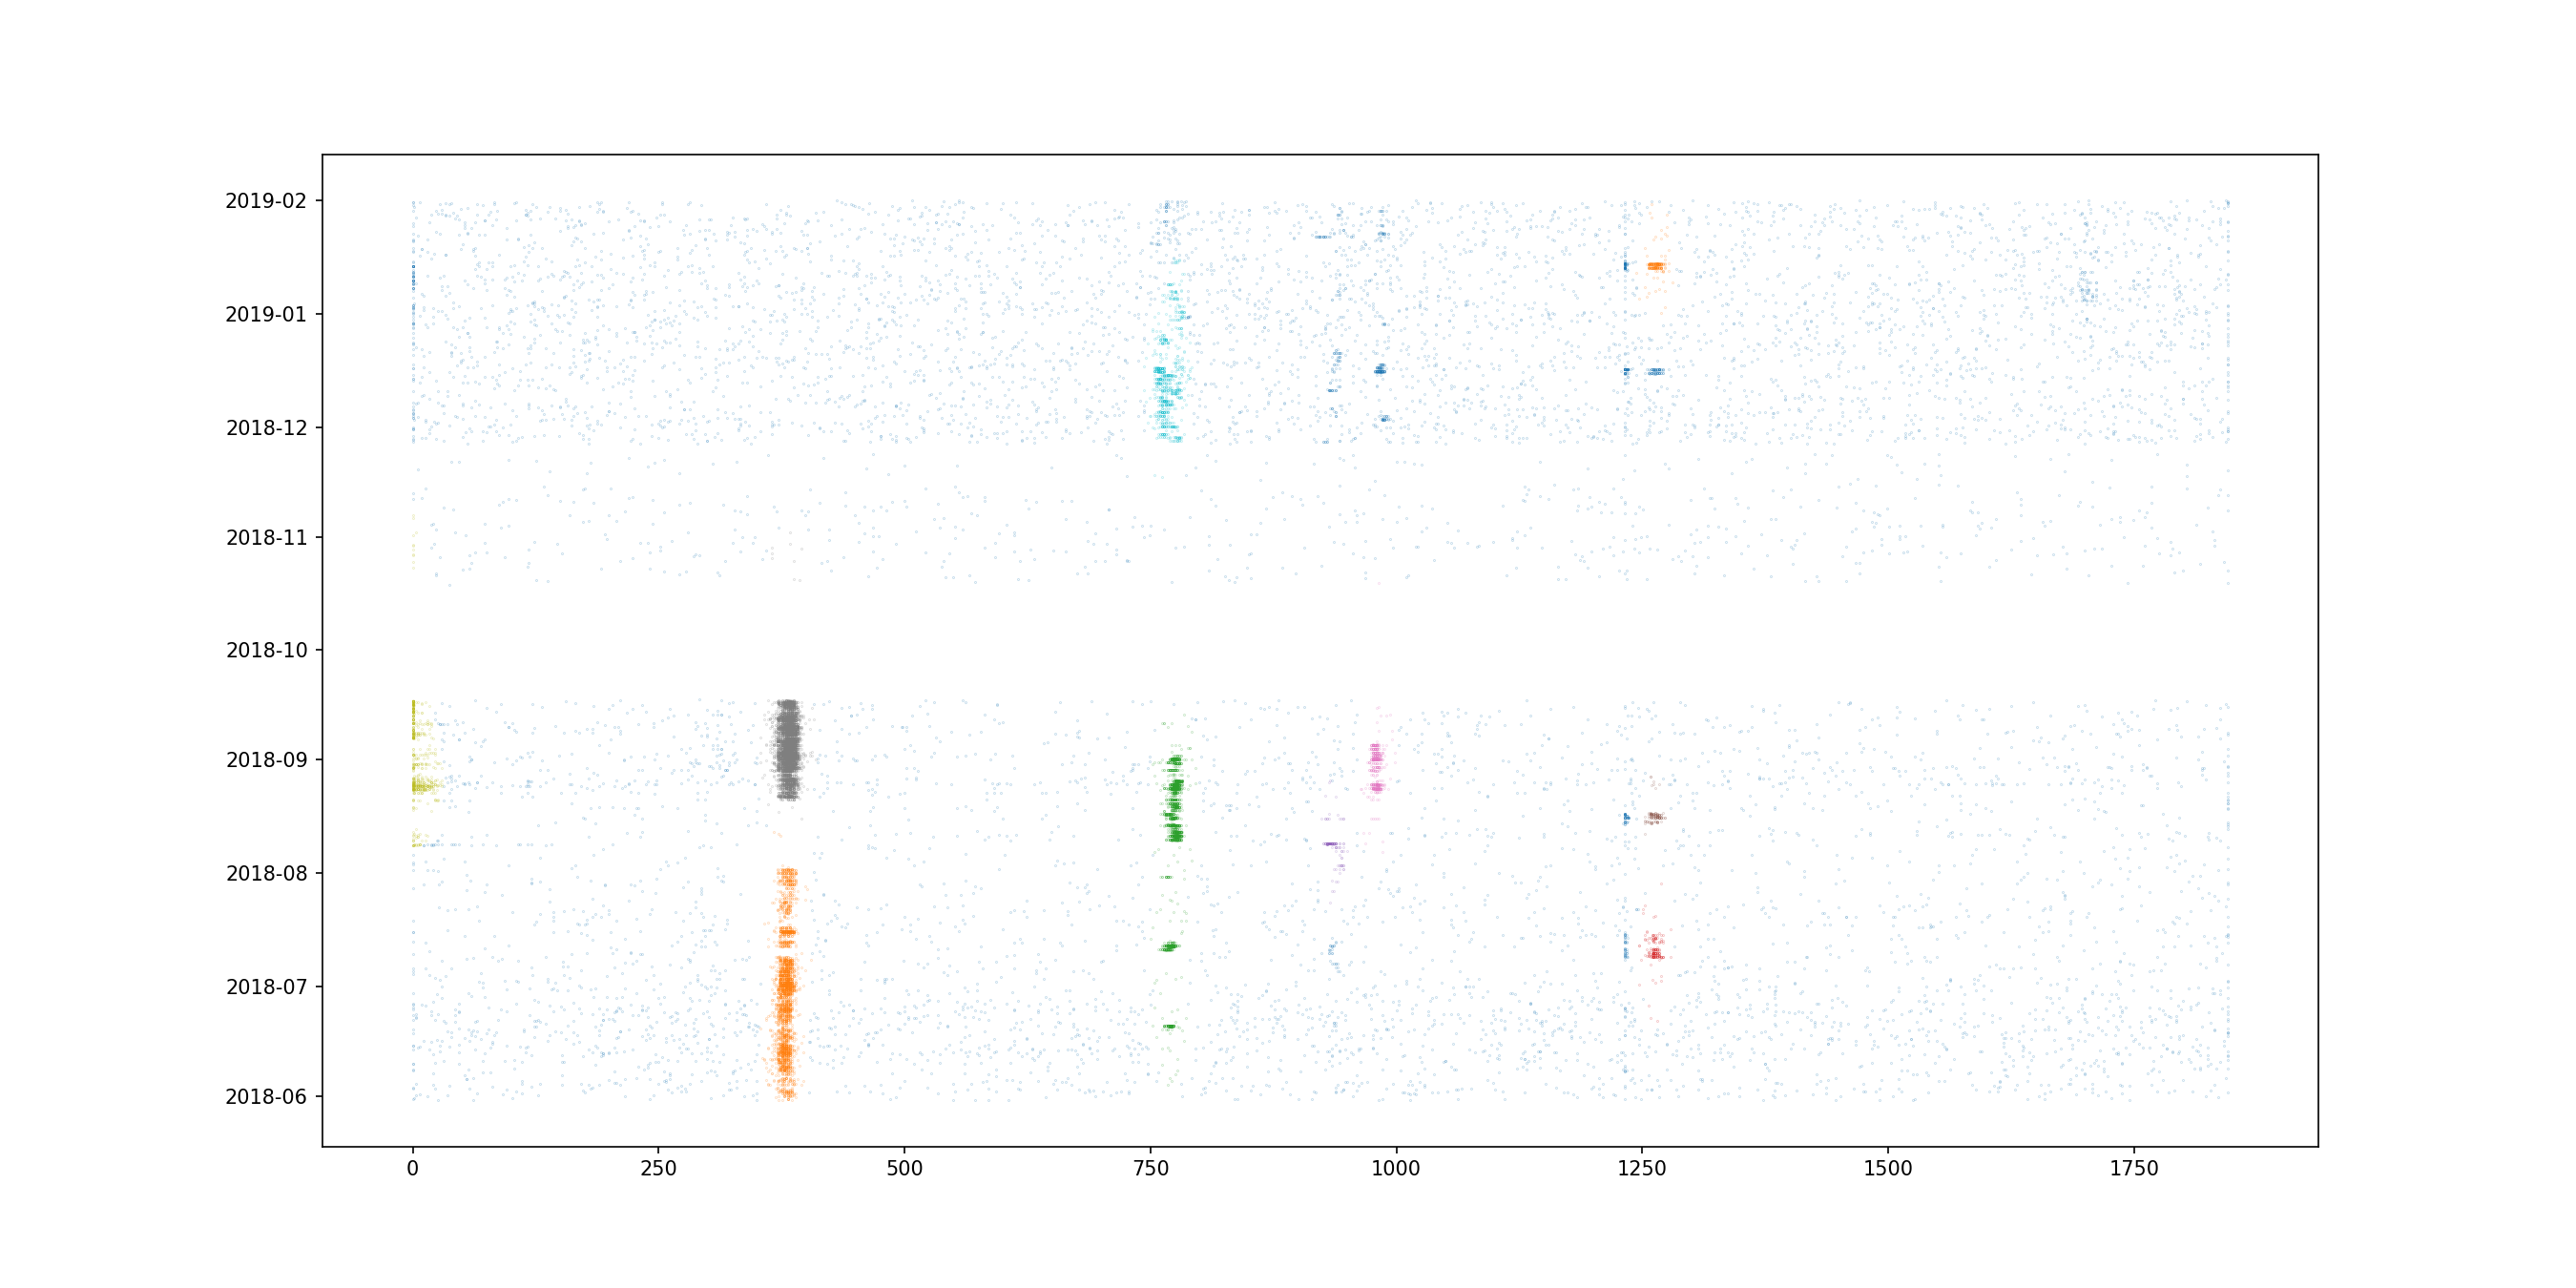

In [172]:
DBSCAN1(5,10,10,100)

# Kabel 6

There are 0 clusters


<IPython.core.display.Javascript object>


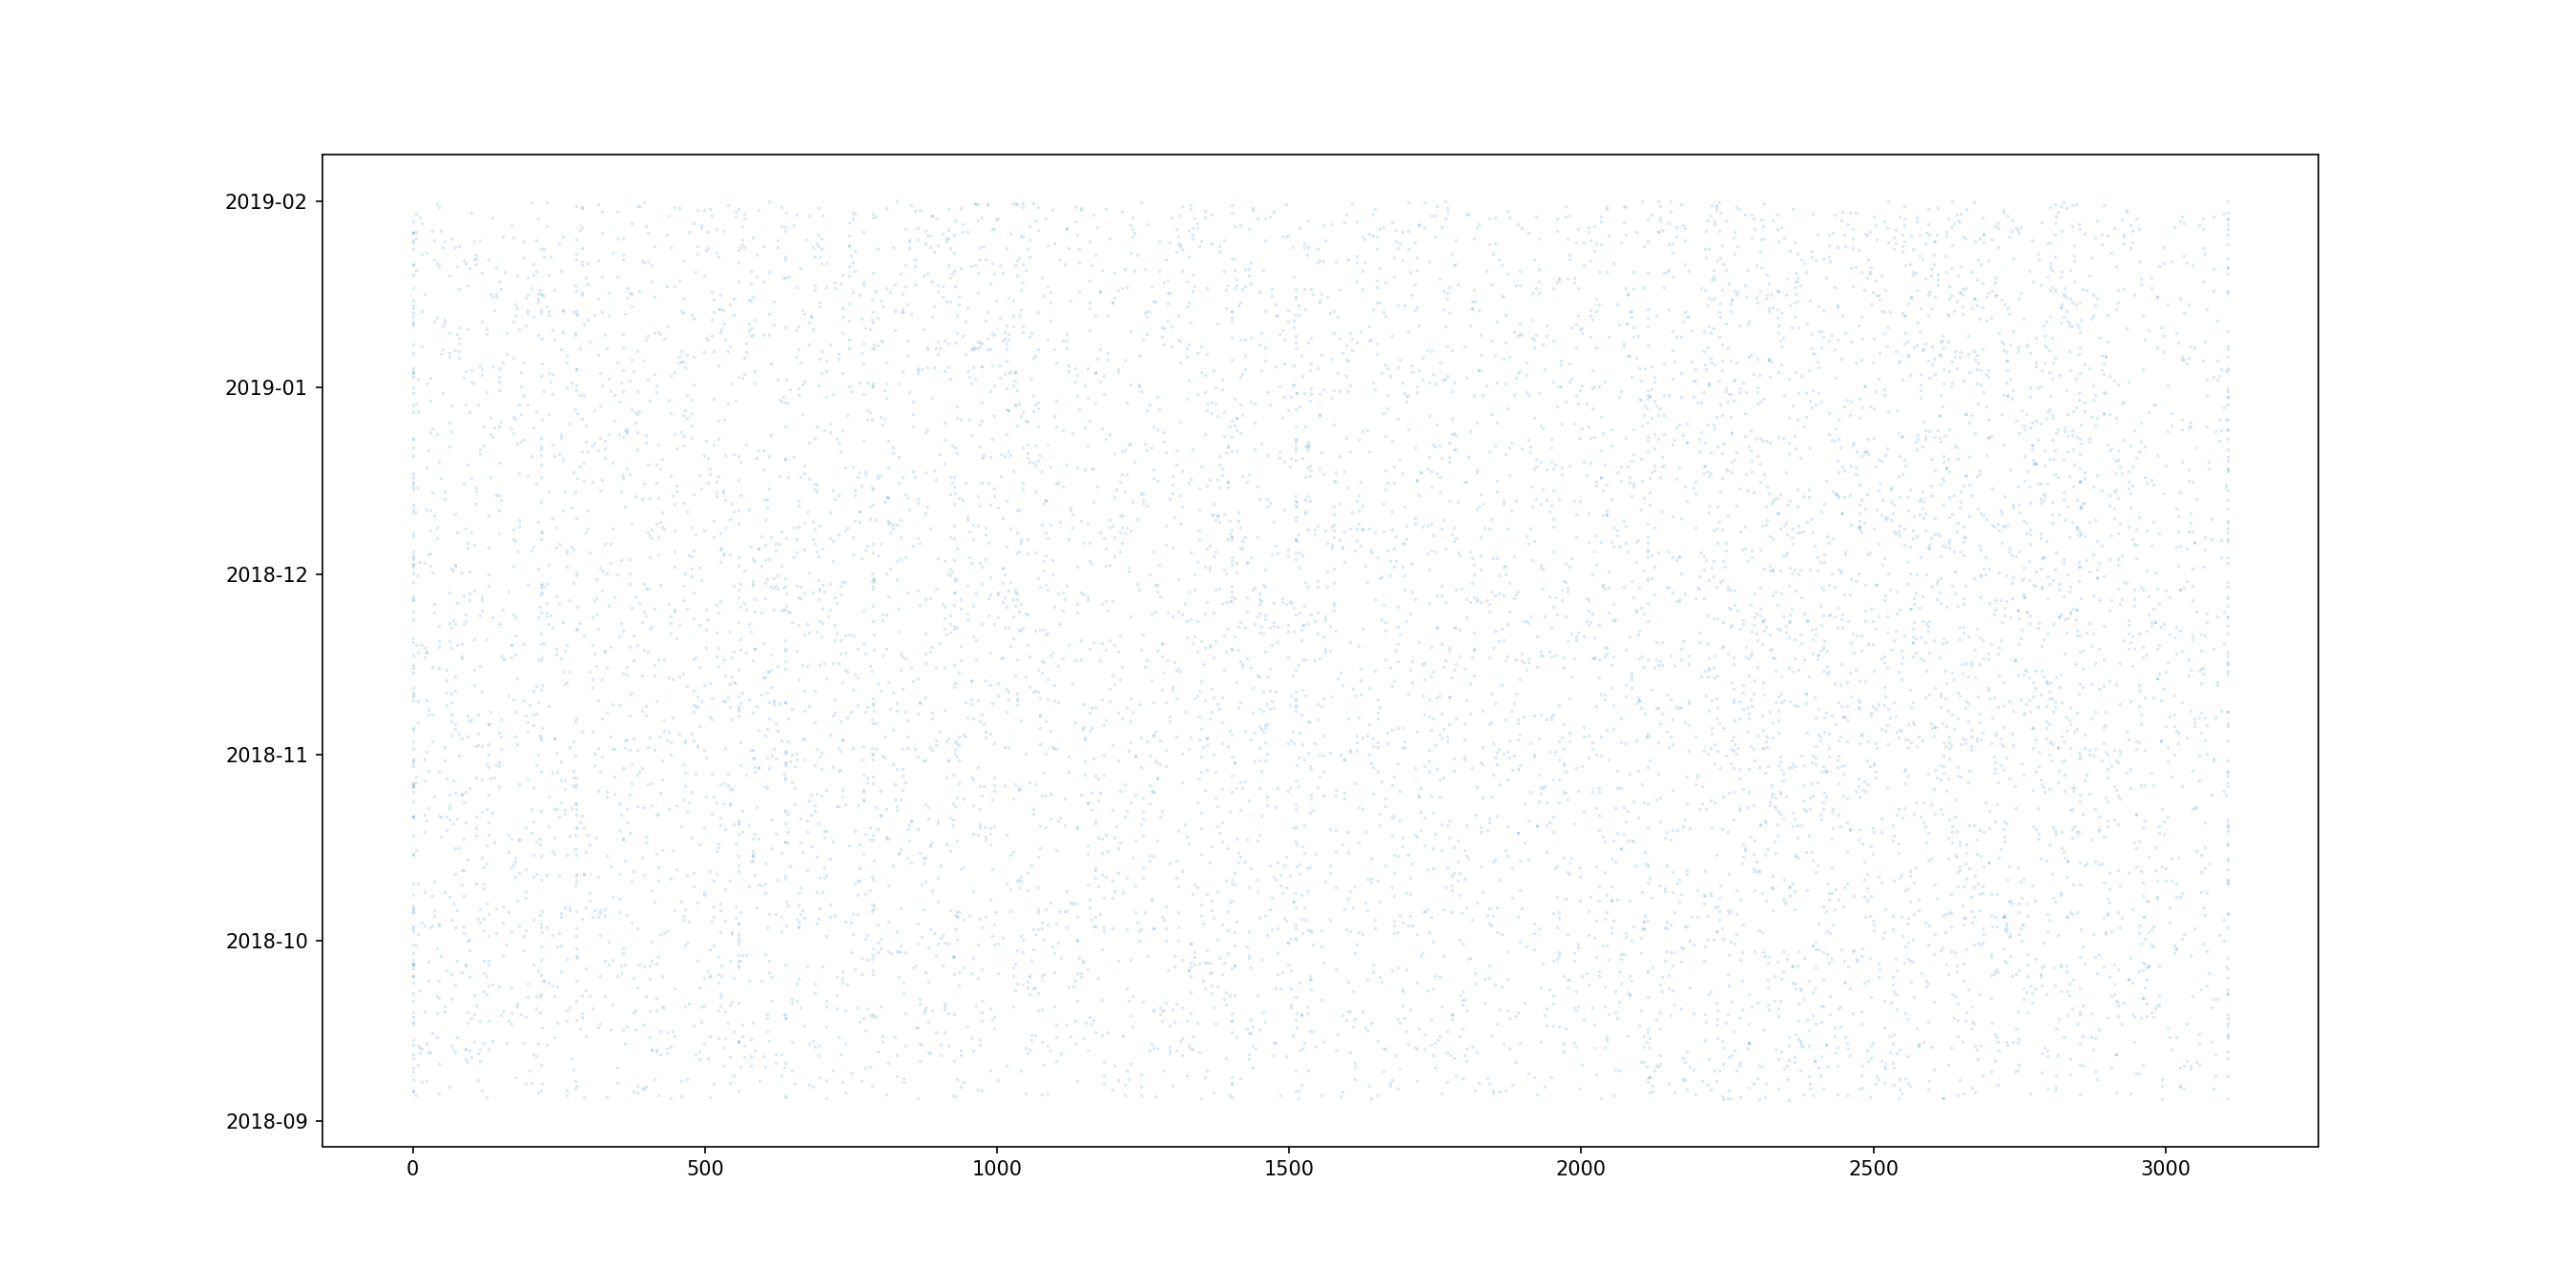

In [173]:
DBSCAN1(6,10,10,100)

# Kabel 7

There are 0 clusters


<IPython.core.display.Javascript object>


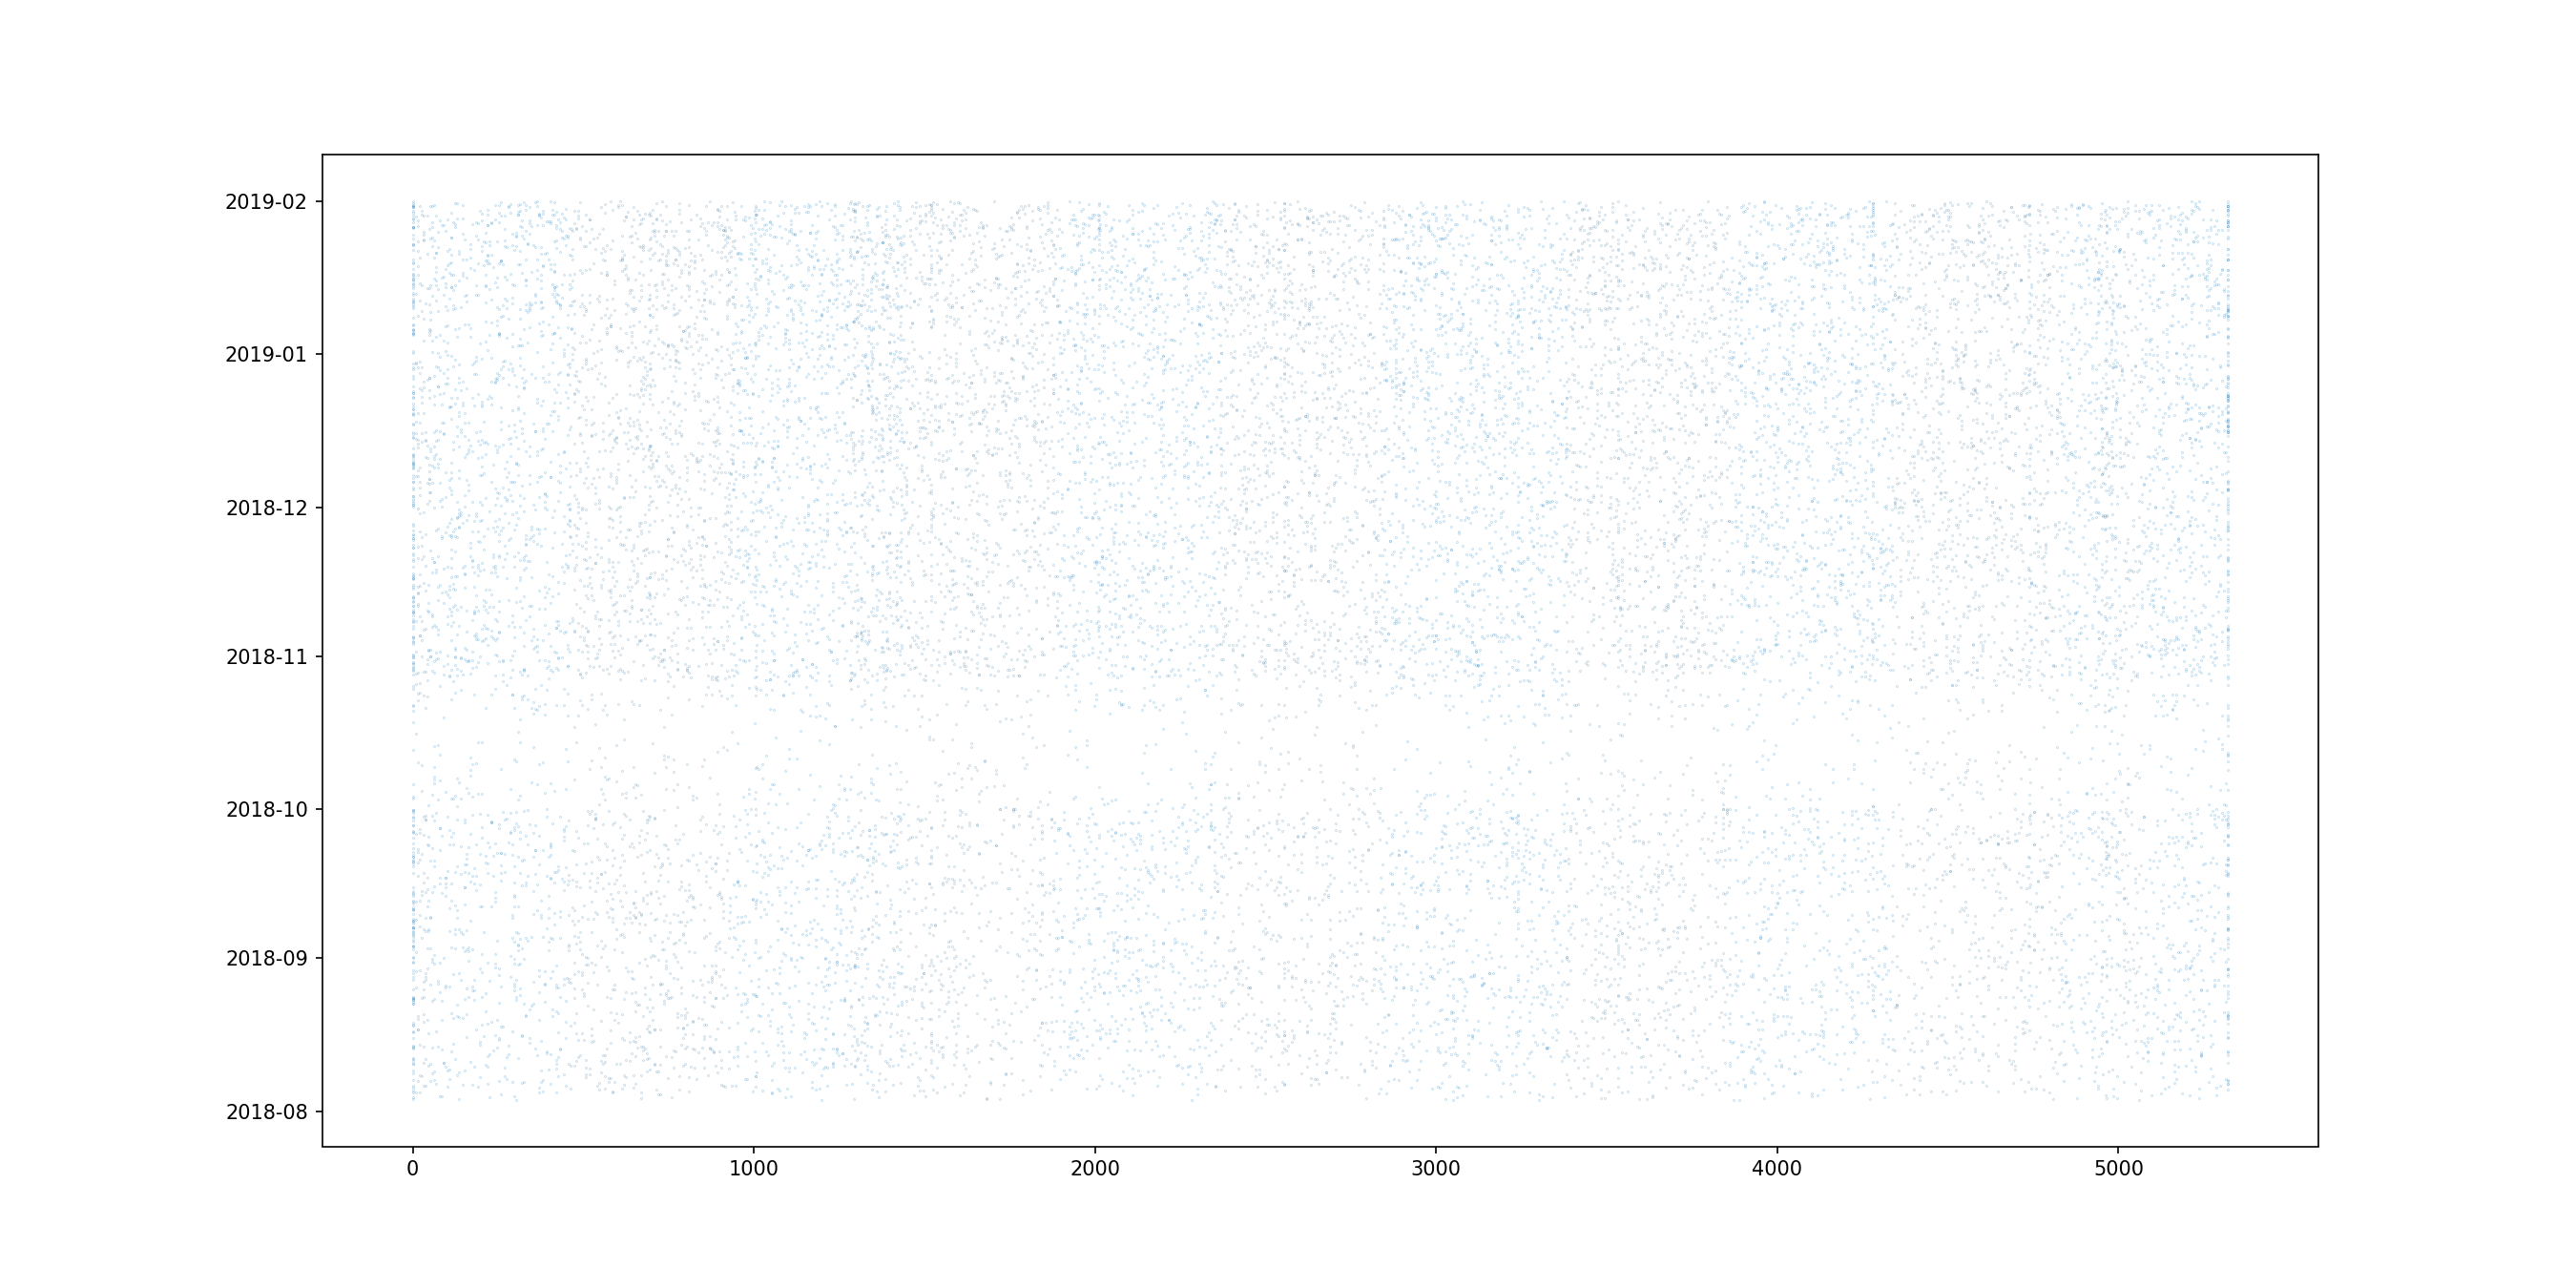

In [174]:
DBSCAN1(7,10,10,100)

# Kabel 8

There are 0 clusters


<IPython.core.display.Javascript object>


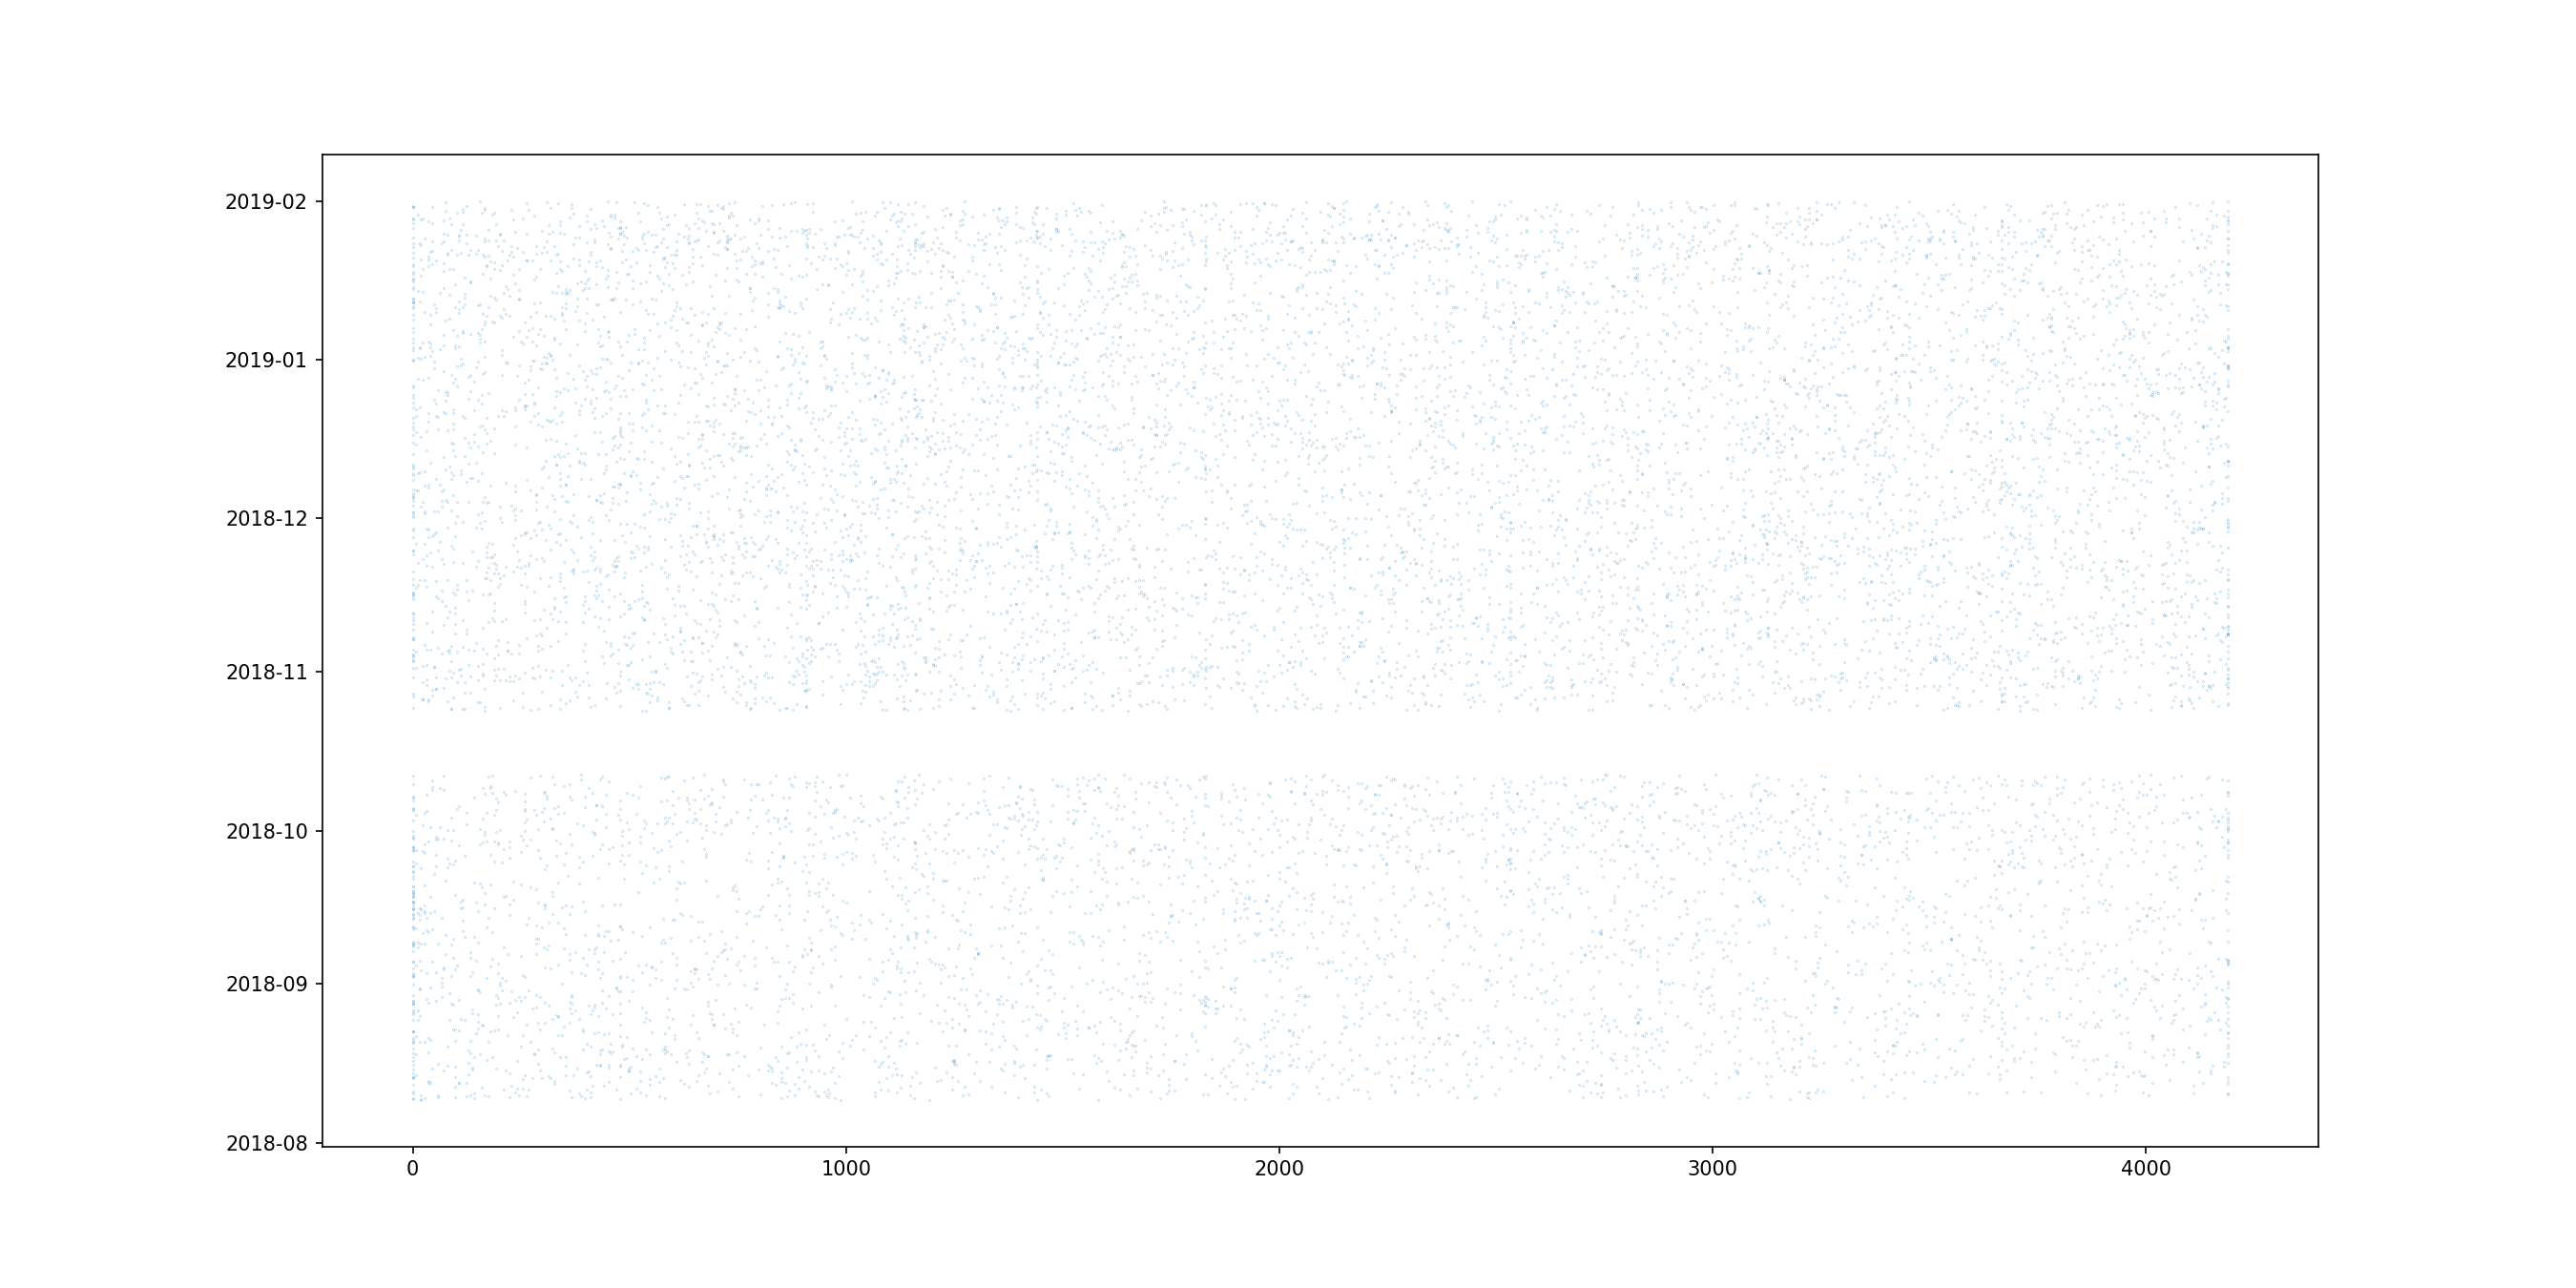

In [175]:
DBSCAN1(8,10,10,100)

# Voordelen
- Geeft voor elk punt aan of en in welk cluster het zit
- Vrij nauwkeurig op de dataset
- Simpele code

# Nadelen
- Minimaal 1 seconde per cluster
- Parameter zijn lastig te kiezen (mogelijk last van overfitting)
- Gebruikt veel geheugen